<div style="font-size:40px; font-weight:900;"> TITRE </div>








<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Vision" data-toc-modified-id="Vision-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vision</a></span><ul class="toc-item"><li><span><a href="#External-libraries" data-toc-modified-id="External-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>External libraries</a></span></li><li><span><a href="#Color-detection" data-toc-modified-id="Color-detection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Color detection</a></span><ul class="toc-item"><li><span><a href="#The-HSV-color-space" data-toc-modified-id="The-HSV-color-space-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>The HSV color space</a></span></li><li><span><a href="#Range-finding-script" data-toc-modified-id="Range-finding-script-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Range finding script</a></span></li></ul></li><li><span><a href="#Polygon-extraction" data-toc-modified-id="Polygon-extraction-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Polygon extraction</a></span><ul class="toc-item"><li><span><a href="#Working-principle" data-toc-modified-id="Working-principle-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Working principle</a></span></li><li><span><a href="#Test-script" data-toc-modified-id="Test-script-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Test script</a></span></li></ul></li><li><span><a href="#Robot-detection" data-toc-modified-id="Robot-detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Robot detection</a></span><ul class="toc-item"><li><span><a href="#Find-the-robot" data-toc-modified-id="Find-the-robot-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Find the robot</a></span></li><li><span><a href="#Position,-orientation-and-scale" data-toc-modified-id="Position,-orientation-and-scale-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Position, orientation and scale</a></span></li><li><span><a href="#The-code" data-toc-modified-id="The-code-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>The code</a></span></li></ul></li><li><span><a href="#Obstacles-detection" data-toc-modified-id="Obstacles-detection-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Obstacles detection</a></span><ul class="toc-item"><li><span><a href="#Dilatation" data-toc-modified-id="Dilatation-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Dilatation</a></span></li><li><span><a href="#Overlapping-obstacles-merge" data-toc-modified-id="Overlapping-obstacles-merge-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Overlapping obstacles merge</a></span></li></ul></li><li><span><a href="#Code-encapsulation" data-toc-modified-id="Code-encapsulation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Code encapsulation</a></span></li></ul></li><li><span><a href="#Global-navigation" data-toc-modified-id="Global-navigation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Global navigation</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Local-navigation" data-toc-modified-id="Local-navigation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Local navigation</a></span></li><li><span><a href="#Main-code" data-toc-modified-id="Main-code-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main code</a></span></li></ul></div>

# Introduction



# Vision

## External libraries
The purpose of this computer vision module is to provide the robot with information about the world globally surrounding it.

The computer vision module must be able to detect:
* The robot, it's position and orientation
* The obstacles
* The objectives
* The world scale

In order to detect these different objects, we decided to use different colors. And detect color ranges in the image. These colors will then be transformed to shapes. That allows us to extract the contours of obstacles or then centroids of targets. it will also allow us to find the orientation of the robot.

We use the OpenCV library. This library requires numpy for it's data types and we also added the matplotlib library to display examples and debug information.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#COLORS 
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)
LIGHTBLUE = (255, 127, 0)
TURQUOISE = (255, 255, 0)
PINK = (255, 0, 255)
ORANGE = (0, 127, 255)
YELLOW = (0, 255, 255)

## Color detection

The idea behind our color detection is to define each of our interesting colors as a range of values. When using opneCV's default BGR color space, our colors would need to be defined as a volume in the color space. This is necessary because there are always variations in the color seen by the camera. Find and tunes these volumes in the BGR color space is difficult because BGR is not an intuitive way of describing colors. 
We decided to use the HSV color space because it is a more "human intuitive" representation of the colors.


### The HSV color space
The HSV color space represents the colors in three dimensions like BGR. But it has a more human intuitive approach as the question of "which color it is?" (Hue) can be answered on one dimention. The two others are "the ammount of coloration" (Saturation and the "darkness" (Value). The HSV color space is a cylindrical coordinates representation of the colors as it is illustrated here:

<img src="images/hsv_cyl.png" alt="The HSV color space" width="600"/>

In OpenCV, we can easily convert an image to HSV using the color conversion function ```frame = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)```. The result will be an image with pixels encoded with three values: Hue (between 0 and 179), Saturation and Value (both between 0 and 255).
Thanks to this representation we can easily select colors by taking just a "slice of cylinder" defined by ```color_low = np.array([h_low, s_low, v_low], dtype=np.uint8)``` and ```color_high = np.array([h_high, s_high, v_high], dtype=np.uint8)```. Such a simple selection volume allows us to use the color selection function ```hsv = cv2.inRange(frame,  color_low, color_high)```. This function will return a mask that is white whenever a pixel is in the range of colors.

One of the problems with the HSV color range detection method is that the color is at the 179 -> 0 boundary. so wee need to choose between the yellowish red which is on the 0 side or the pinkish red which is on the 179 part. We decided not to handle the detection for all hues of red as it would add complexity and we can simply use another color :)


### Range finding script
We wrote a simple range finding script to help us find the color boundaries for different interesting colors.
The script simply displays the webcam image with the inRange color mask as overlay. The range can be tuned in real time using sliders. This script allows us to tune the color detection for optimal performance in different ligntning environement and for different colors.









In [ ]:
cap = cv2.VideoCapture(0)
     

cv2.namedWindow("Hsv detect", cv2.WINDOW_NORMAL)

cv2.createTrackbar('H low', 'Hsv detect', 0, 179, lambda empty: empty)
cv2.createTrackbar('S low', 'Hsv detect', 0, 255, lambda empty: empty)
cv2.createTrackbar('V low', 'Hsv detect', 0, 255, lambda empty: empty)

cv2.createTrackbar('H high', 'Hsv detect', 0, 179, lambda empty: empty)
cv2.createTrackbar('S high', 'Hsv detect', 0, 255, lambda empty: empty)
cv2.createTrackbar('V high', 'Hsv detect', 0, 255, lambda empty: empty)

cv2.setTrackbarPos('H low', 'Hsv detect', 83)
cv2.setTrackbarPos('S low', 'Hsv detect', 165)
cv2.setTrackbarPos('V low', 'Hsv detect', 100)

cv2.setTrackbarPos('H high', 'Hsv detect', 120)
cv2.setTrackbarPos('S high', 'Hsv detect', 255)
cv2.setTrackbarPos('V high', 'Hsv detect', 255)

while(True):

    ret, imag = cap.read()
    
    frame = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
    
    

    # Trackbars realtime position
    h1 = cv2.getTrackbarPos('H low', 'Hsv detect')
    s1 = cv2.getTrackbarPos('S low', 'Hsv detect')
    v1 = cv2.getTrackbarPos('V low', 'Hsv detect')

    h2 = cv2.getTrackbarPos('H high', 'Hsv detect')
    s2 = cv2.getTrackbarPos('S high', 'Hsv detect')
    v2 = cv2.getTrackbarPos('V high', 'Hsv detect')

    color_low = np.array([h1, s1, v1], np.uint8)
    color_high = np.array([h2, s2, v2], np.uint8)

            
    hsv = cv2.inRange(frame,  color_low, color_high)
    
    hsv_inv = cv2.bitwise_not(hsv)
    
    blue = np.zeros(frame.shape, np.uint8)

    blue[:]=BLUE
    
    bg = cv2.bitwise_and(imag,imag,mask = hsv_inv)
    fg = cv2.bitwise_and(blue,blue,mask = hsv)
    
    final = cv2.bitwise_or(bg, fg)
   
    cv2.imshow('Hsv detect', final)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Polygon extraction

### Working principle
Provided a mask of the colored areas, we need to the borders of the colored areas and transform those borders into simple polygons. 

This is done using OpenCV's findContours function ```contours, hierarchy = cv2.findContours(hsv, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)``` The function uses an extended version of the border following algorithm. We configure the function so that it only returns external borders, thus eliminating holes in the mask and an approximation of the borders using as few points as possible. This is done in the function ```def find_color(frame, hsv_low, hsv_high)```

Then, we discard the borders that are too small as they are likely to be falsely identified objects. The following condition ```if (cv2.contourArea(cnt) >= AREA_THRESH):``` allows us to keep only the borders big enough.
The last step, is to merge the points that are too close together in order to create a low polygon approximation for each object. This is done in the function ```def cleanup_contours(contours, mode=0)```. 

In [12]:
def cleanup_contours(contours, mode=0):
    #clean contours
    AREA_THRESH = 100
    MERGE_THRESH = 0.04
    EPSILON = 40
    
    clean_contours = []
    
    for cnt in contours:
        # only take big enough contours
        if (cv2.contourArea(cnt) >= AREA_THRESH):
            #convex hull
            #hull = cv2.convexHull(cnt)
            hull = cnt
            #lower poly approx
            if mode == 0:
                epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
            else:
                epsilon = EPSILON
            approx = cv2.approxPolyDP(hull,epsilon,True)
            
            clean_contours.append(approx)
            
    return clean_contours


def find_color(frame, hsv_low, hsv_high):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    

    #Using inRange to find the desired range
    mask = cv2.inRange(hsv,  hsv_low, hsv_high)
    
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    
    return cleanup_contours(contours)

### Test script
In order to test the polygon extraction, we use the previously created sript with the polygon detection as addition. 

In [13]:
cap = cv2.VideoCapture(0)
     

cv2.namedWindow("Hsv detect", cv2.WINDOW_NORMAL)

cv2.createTrackbar('H low', 'Hsv detect', 0, 179, lambda empty: empty)
cv2.createTrackbar('S low', 'Hsv detect', 0, 255, lambda empty: empty)
cv2.createTrackbar('V low', 'Hsv detect', 0, 255, lambda empty: empty)

cv2.createTrackbar('H high', 'Hsv detect', 0, 179, lambda empty: empty)
cv2.createTrackbar('S high', 'Hsv detect', 0, 255, lambda empty: empty)
cv2.createTrackbar('V high', 'Hsv detect', 0, 255, lambda empty: empty)

cv2.setTrackbarPos('H low', 'Hsv detect', 83)
cv2.setTrackbarPos('S low', 'Hsv detect', 165)
cv2.setTrackbarPos('V low', 'Hsv detect', 100)

cv2.setTrackbarPos('H high', 'Hsv detect', 120)
cv2.setTrackbarPos('S high', 'Hsv detect', 255)
cv2.setTrackbarPos('V high', 'Hsv detect', 255)

while(True):

    ret, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    

    # Trackbars realtime position
    h1 = cv2.getTrackbarPos('H low', 'Hsv detect')
    s1 = cv2.getTrackbarPos('S low', 'Hsv detect')
    v1 = cv2.getTrackbarPos('V low', 'Hsv detect')

    h2 = cv2.getTrackbarPos('H high', 'Hsv detect')
    s2 = cv2.getTrackbarPos('S high', 'Hsv detect')
    v2 = cv2.getTrackbarPos('V high', 'Hsv detect')

    color_low = np.array([h1, s1, v1], np.uint8)
    color_high = np.array([h2, s2, v2], np.uint8)

            
    clean_contours = find_color(frame, color_low, color_high)
    
    cv2.drawContours(frame, clean_contours, -1, GREEN, 3)
    
    #draw points
    for cnt in clean_contours:
        for pt in cnt:
            frame = cv2.circle(frame, (pt[0][0], pt[0][1]), radius=5, color=RED, thickness=-1)
            
    cv2.imshow('Hsv detect', frame)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Robot detection
In order to simply find the robot's position, we place a blue isosceles triangle on top the the Thymio. The triangle must be facing forward and it's long side must be twice as long as it's short side. 

### Find the robot

![image](images/MR_01.png)

The idea for the robot detection is to find every polygon that is a triangle and sort them according to a score, The more the triangle has the right proportions, the lower score it gets. We then use the lowest score as the robot. 


$$Score = \frac{||dAB-dCA||^2 + 2\cdot{}||(dBC - dAB)||^2 + 2\cdot{}||(dBC - dCA)||^2}{||dAB||^2}$$

The score is calculated in python using the norm functions of numpy. ```score = (abs(dAB-dCA)+abs(K*dBC - dAB)+abs(K*dBC - dCA))/np.linalg.norm(dAB)```

### Position, orientation and scale
From the triangle's summits, we can find the robot's position, orientation and size. The position and orientation will be used for control and the size is used during the initialisation to find the image's scale. The position of the robot is computed as the mean value of the triangle's vertices. 
The angle is computed from the triangle direction vector using numpy's ```angle = np.arctan2(direction[1], direction[0])``` function. This function calculates the angle of a vector with the arctangeant of it's components while properly handling the singularity at an angle of $\pi$. 

### The code
The code takes an openCv standart frame as parameter as well as the scale of the world. It returns 

Robot position object: [position, angle, visible, size in px]
Robot position object: [array([1450,  892]), -1.6814535479687922, True, 104.13692908858029]


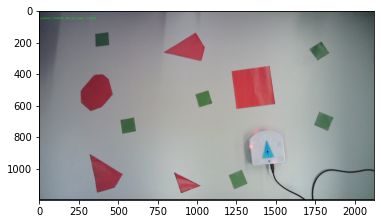

In [14]:
#calibration
BLUE_LOW  = [87, 129, 80]
BLUE_HIGH = [131, 255, 255]

def detect_robot(frame, scale=1):
    blue_low = np.array(BLUE_LOW, np.uint8)
    blue_high = np.array(BLUE_HIGH, np.uint8)
    frame = frame.copy()
    
    clean_contours = find_color(frame, blue_low, blue_high)
    
    good_cnt = []
    
    for cnt in clean_contours:
        if(len(cnt) == 3):
            K = 2
            A = 0
            B = 0
            C = 0
            dAB = 0
            dBC = 0
            dCA = 0
            p1 = cnt[0][0]
            p2 = cnt[1][0]
            p3 = cnt[2][0]
            d1 = np.linalg.norm(p2-p1)
            d2 = np.linalg.norm(p3-p2)
            d3 = np.linalg.norm(p1-p3)
            min_ix = np.argmin([d1, d2, d3])
            if(min_ix == 0):
                A = p3
                B = p2
                C = p1
                dAB = d2
                dBC = d1
                dCA = d3
            elif(min_ix == 1):
                A = p1
                B = p3
                C = p2
                dAB = d3
                dBC = d2
                dCA = d1
            else:
                A = p2
                B = p3
                C = p1
                dAB = d2
                dBC = d3
                dCA = d1
            score = abs(dAB-dCA)+abs(K*dBC - dAB)+abs(K*dBC - dCA)/np.linalg.norm(dAB)
            good_cnt.append([A, B, C, score])
                       
    good_cnt = sorted(good_cnt, key = lambda x: x[3])
    
    robot_pos = [np.array([0, 0]), 0, False, 0]
    
    if(len(good_cnt) > 0):
        robot_visible = True
        A = good_cnt[0][0]
        B = good_cnt[0][1]
        C = good_cnt[0][2]
        D = (np.mean([[B, C]], axis=1))[0]
        
        
        Center = (np.mean([[A, B, C]], axis=1))[0]

        direction = A - D
        
        size = np.linalg.norm(direction)
        
        angle = np.arctan2(direction[1], direction[0])
        
        frame = cv2.line(frame, (int(D[0]), int(D[1])), (int(A[0]), int(A[1])), color=BLUE, thickness=1)
        frame = cv2.circle(frame, (int(Center[0]), int(Center[1])), radius=5, color=BLUE, thickness=-1)
        Center = np.multiply(Center, scale).astype(int)
        text =  "position: ({:0.2f}, {:0.2f}) angle: {:0.4f}".format(Center[0], Center[1], angle)
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(frame, text, (10, 50), font, 0.5, GREEN, 1, cv2.LINE_AA)
        
        
        robot_pos = [Center, angle, True, size]
        
    return robot_pos, frame

frame = cv2.imread("images/colors.png")

pos, image = detect_robot(frame)


print("Robot position object: [position, angle, visible, size in px]")
print("Robot position object:", pos)
    
plt.imshow(image[:,:,::-1])


## Obstacles detection
The obstacles detection uses the polygon detection algorithm with the addition of the obstacles dilataion.

### Dilatation
The idea for the second dilatation method is to move the edges of each polygon outwards of a certain ammount to guarantee that the robot does not touch an edge. Additionally, we elongate the moved edges in order to cover part of the corners. Then, we move each vertex outwards to fully conver the corners. All these new verices maake the dilated obstacle.

### Overlapping obstacles merge
In some cases, after the dilatation, some obstacles that where aalready close might overlap. These overlapping obstacles should be merged into one. 

In order to do that, we draw the dilated polygons in white onto a black image. Then we run the contour finding alogorithm and openCV will find the merged dilated obstacles.

Contour object:  [array([[ 769,  934],
       [ 814, 1197],
       [1064, 1197],
       [1147, 1125],
       [1117, 1043],
       [ 852,  910]]), array([[ 249,  805],
       [ 278, 1197],
       [ 549, 1197],
       [ 659, 1021]]), array([[448, 279],
       [136, 490],
       [280, 752],
       [592, 545]]), array([[ 691,  209],
       [ 717,  347],
       [1058,  423],
       [1118,  350],
       [1173,  720],
       [1600,  665],
       [1540,  247],
       [1135,  296],
       [1180,  222],
       [1041,   19]])]


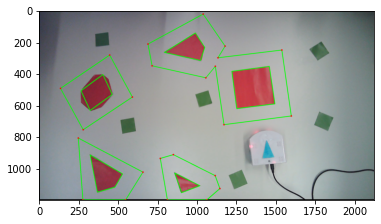

In [15]:
RED_LOW  = [150, 100, 100]
RED_HIGH = [179, 255, 255]

DIL_COEFF = 100
EXP_RATIO = 60

def detect_obstacles_alt(frame, scale=1):
    frame = frame.copy()
    red_low = np.array(RED_LOW, np.uint8)
    red_high = np.array(RED_HIGH, np.uint8)
    
    clean_contours = find_color(frame, red_low, red_high)
            
    original_contours = []
    dil_contour = []
    for cnt in clean_contours:
        mom = cv2.moments(cnt)
        if mom["m00"] != 0:
            cx = int(mom["m10"] / mom["m00"])
            cy = int(mom["m01"] / mom["m00"])
            C = np.array([cx, cy])
        else:
            C = np.array([0, 0])
        ncnt = []
        ocnt = []
        cnt = list(cnt)
        cnt.append(cnt[0])
        #print(cnt)
        for i, _ in enumerate(cnt[0:-1]):
            pt1 = cnt[i][0]
            pt2 = cnt[i+1][0]
            seg = pt2-pt1
            d = seg/np.linalg.norm(seg)
            n = np.array([-seg[1], seg[0]])/np.linalg.norm(seg)

            N = pt1-C
            N = N/np.linalg.norm(N)
            npt = (pt1+(DIL_COEFF+EXP_RATIO/2)/scale*N).astype(int)

            npt1 = (pt1+DIL_COEFF/scale*n - EXP_RATIO/scale*d).astype(int)
            npt2 = (pt2+DIL_COEFF/scale*n + EXP_RATIO/scale*d).astype(int)

            #frame = cv2.circle(frame, (npt[0], npt[1]), radius=5, color=(127, 0, 255), thickness=-1)
            #frame = cv2.circle(frame, (npt1[0], npt1[1]), radius=5, color=(0, 0, 255), thickness=-1)
            #frame = cv2.circle(frame, (npt2[0], npt2[1]), radius=5, color=(0, 127, 255), thickness=-1)

            ncnt.append(npt)
            ncnt.append(npt1)
            ncnt.append(npt2)
            ocnt.append(cnt[i][0])
        
        dil_contour.append(np.array(ncnt))
        original_contours.append(np.multiply(ocnt, scale).astype(int))
        
        
    
    cv2.drawContours(frame, clean_contours, -1, (0,255,0), 3)
    
    
    black = np.zeros(frame.shape[:2], dtype=np.uint8)
    
    for i in range(len(dil_contour)):
        cv2.drawContours(black, dil_contour, i, (255), -1)

    plt.imshow(frame)
    
    #find contours
    
    contours, hierarchy = cv2.findContours(black, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    clean_dil_contours = cleanup_contours(contours, 1)
    cv2.drawContours(frame, clean_dil_contours, -1, (0,255,0), 3)

    scaled_contours = []
    for cnt in clean_dil_contours:
        ncnt = []
        for pt in cnt:
            frame = cv2.circle(frame, (pt[0][0], pt[0][1]), radius=5, color=(0, 0, 255), thickness=-1)
            ncnt.append(pt[0])
        scaled_contours.append(np.multiply(ncnt, scale).astype(int))
    
    
    return scaled_contours, original_contours, frame

frame = cv2.imread("images/colors.png")

cont, ret, image = detect_obstacles_alt(frame)

print("Contour object: ", cont)
    
plt.imshow(image[:,:,::-1])

## Target detection
The target detection uses the polygon detection to fond the conours 

targets object:  [[1263, 1067], [563, 726], [1807, 701], [1045, 555], [1778, 248], [401, 179]]


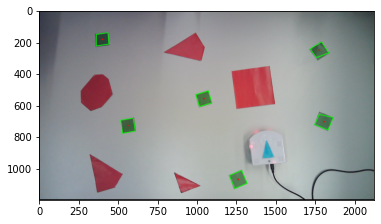

In [16]:
GREEN_LOW  = [41, 64, 0]
GREEN_HIGH = [85, 140, 140]
def detect_targets(frame, scale=1):
    frame = frame.copy()
    green_low = np.array(GREEN_LOW, np.uint8)
    green_high = np.array(GREEN_HIGH, np.uint8)
    
    clean_contours = find_color(frame, green_low, green_high)
    
    centroids = []
    
    for cnt in clean_contours:
        mom = cv2.moments(cnt)
        if mom["m00"] != 0:
            cx = int(mom["m10"] / mom["m00"])
            cy = int(mom["m01"] / mom["m00"])
            centroids.append([cx, cy])
        else:
            pass
            
        
            
    cv2.drawContours(frame, clean_contours, -1, (0,255,0), 3)
    scaled_centroids = []
    
    for pt in centroids:
        frame = cv2.circle(frame, (pt[0], pt[1]), radius=5, color=(0, 0, 255), thickness=-1)
        scaled_centroids.append(np.multiply(pt, scale).astype(int).tolist())
        
    return scaled_centroids, frame

frame = cv2.imread("images/colors.png")

targ, image = detect_targets(frame)
    
print("targets object: ", targ)
plt.imshow(image[:,:,::-1])

## Code encapsulation
To provide a clean interface for the other modules of the project, the code has been rearranged in a class. This allows us to handle internal global variables in a clean way.

In [17]:
#entire class?

# Global navigation

The goal of this part is to create a trajectory that will allow the Thymio to pass through several interest points and come back to his initial position.

The trajectory has to ensure that the Thymio avoid the global obstacles detected by the camera.


## Path planning : Process flow

The creation of our trajectory is composed of the following steps :

- Dilatation of the obstacles to avoid collisions.

- Visibility graph computation by using the previously dilated obstacles.

- Path planning computation by using the visibility graph and the interest point positions.


### Obstacle dilatation

To perform the obstacle dilatation, we have implemented two different algorithms in parallel with the aim of taking the one that will provide the best results.

The first algorithm that we used is based on the dilatation function provided in the OpenCV library :

- Find the contours of the global obstacles.

- Create a grayscale image with the global obstacles in white and the rest in black.

- Dilate the global obstacles in this image.

- Find the new dilated contours.

For more details on the OpenCV dilatation function, see [Morphological transformations in OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).

In [61]:
import math

#define
X = 0
Y = 1
DIL_COEFF_K = 10

In [62]:
def detect_obstacles(frame, scale=1):
    """
    this function finds the obstacles and their dilation. We use openCV to dilate the obstacles  
    frame       standard opencv BGR image
    scale       scale of the world

    returns     dilated_contours, original_contours, frame with debug overlay
    """

    frame = frame.copy()
    red_low = np.array(RED_LOW, np.uint8)
    red_high = np.array(RED_HIGH, np.uint8)
    
    clean_contours = find_color(frame, red_low, red_high)

    cv2.drawContours(frame, clean_contours, -1, (0,255,0), 3)
            
    original_contours = []
    for cnt in clean_contours:
        ocnt = []
        for pt in cnt:
            ocnt.append(pt[0])
        original_contours.append(np.multiply(ocnt, scale).astype(int))
        
    

    ## DILATATION
    black = np.zeros(frame.shape[:2], dtype=np.uint8)
    

    for i in range(len(clean_contours)):
        cv2.drawContours(black, clean_contours, i, (255), -1)

    plt.figure()
    plt.imshow(black, cmap="gray")
    
    # dilatation
    kernSize = 2*int(DIL_COEFF_K/scale)+1
    kernel = np.ones((kernSize,kernSize),np.uint8)
    black = cv2.dilate(black, kernel, iterations = 10)

    plt.figure()
    plt.imshow(black, cmap="gray")
    
    
    contours, hierarchy = cv2.findContours(black, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    clean_dil_contours = cleanup_contours(contours)

    scaled_contours = []
    for cnt in clean_dil_contours:
        ncnt = []
        for pt in cnt:
            frame = cv2.circle(frame, (pt[0][0], pt[0][1]), radius=5, color=(0, 0, 255), thickness=-1)
            ncnt.append(pt[0])

        scaled_contours.append(np.multiply(ncnt, scale).astype(int))
    
    
    return scaled_contours, original_contours, frame

To see the result of our algorithm, we will use the following function (note that this function will be also used to plot other results computed in the global Navigation part) :

In [63]:
def printGlobalNavigation(contours, contoursMapped, possibleDisplacement = {}, interestPoints = [], trajectory = []):
    """Plot the original contours and the dilated contours using matplotlib
       Plot the visibility graph if possibleDisplacement is given 
       Plot the Thymio's point of interest if interestPoints is given
       Plot the Thymio's path if the trajectory is given

    Parameters
    ----------
    contours : list of list of list
        The camera detect several obstacles
        Each obstacle has several extremities
        Each extremity has (x, y) coordinates

    contoursMapped : list of list of list
        Same structure as contours, each extremity's coordinate has been dilated

    possibleDispacement : dictionary
        Each extremity point has several visible points, i.e possible destinations for the Thymio

    interestPoints : list of list
        Each point of interest has (x, y) coordinates, i.e locations where the thymio need to go

    trajectory : list of list
        Each point of the trajectory has (x, y) coordinates

    Returns
    -------

    """

    xOriginal = []
    yOriginal = []
    xDilated = []
    yDilated = []

    for obstacleOriginal in contours:
        for extremityOriginal in obstacleOriginal:
            xOriginal.append(extremityOriginal[X])
            yOriginal.append(extremityOriginal[Y])

        xOriginal.append(obstacleOriginal[0][X])
        yOriginal.append(obstacleOriginal[0][Y])

        plt.plot(xOriginal, yOriginal, 'b')

        xOriginal.clear()
        yOriginal.clear()

    
    for obstacleDilated in contoursMapped:
        for extremityDilated in obstacleDilated:
            xDilated.append(extremityDilated[X])
            yDilated.append(extremityDilated[Y])

        xDilated.append(obstacleDilated[0][X])
        yDilated.append(obstacleDilated[0][Y])

        plt.plot(xDilated, yDilated, 'm')

        xDilated.clear()
        yDilated.clear()


    if possibleDisplacement:
        for extremity in possibleDisplacement:
            for visiblePoint in possibleDisplacement[extremity]:
                plt.plot([extremity[X], visiblePoint[X]], [extremity[Y], visiblePoint[Y]], 'm')

    
    if interestPoints:
        for point in interestPoints:
            plt.plot([point[X]], [point[Y]], 'kx', markersize=12)


    if trajectory:
        for i in range (1, len(trajectory)):
            plt.arrow(trajectory[i-1][X], trajectory[i-1][Y], trajectory[i][X] - trajectory[i-1][X], trajectory[i][Y] - trajectory[i-1][Y], head_width=8, length_includes_head=True, color  = 'k', width = 2)

    plt.show()

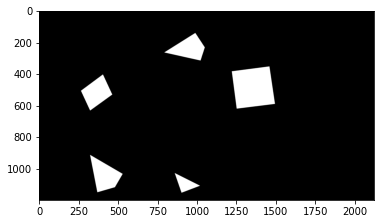

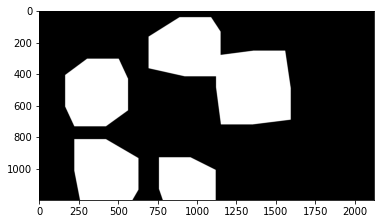

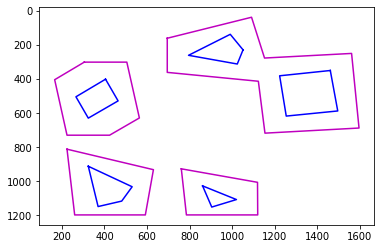

In [64]:
frame = cv2.imread("./images/colors.png")

# Dilate obstacles and print them
scaled_contours, original_contours, ret = detect_obstacles(frame)

plt.figure()
plt.gca().invert_yaxis()
printGlobalNavigation(original_contours, scaled_contours)

ICI MONTRER L'AUTRE METHODE + conclusion sur le choix de la methode


### Visibility graph computation

Remark : Here I will explain in details how visibility graph algorithms work as i think that this is the most important part of the global navigation subsystem.

#### Naive algorithm

Reference : [Naive visibility graph algorithm](https://taipanrex.github.io/2016/09/17/Distance-Tables-Part-1-Defining-the-Problem.html)

Computational Geometry defines visibility graphs in the following way: Given a set $S$ of disjoint polygonal obstacles, we denote the visibility graph $G_{vis}(S)$. It’s nodes are the vertices of $S$ and there is an arc between vertices $v$ and $w$ if they can see each other, that is, if the segment $\overline{vw}$ does not intersect the interior of any obstacle in $S$.

Here is the algorithm :

To build the visibility graph naïvely, we add all the vertices from our set of obstacles to visibility graph G. For each vertex v in G, we check it against all the other vertices in G to see which vertices are visible to v. To check if a vertex w is visible, we need to check if the arc/edge from v to w intersects with any of the edges of the obstacles. If it doesn’t intersect any edges, v is visible to w and vice versa. There is no obstacle blocking the view between v and w and it can be used as part of a path.


The issue with the naïve algorithm is that it’s time complexity is $O(n^3)$. A better algorithm is the D.T.Lee's visibility graph algorithm which runs in $O(n^2log_2n)$.


#### Lee's visibility graph algorithm

Reference : [Lee's visibility graph algorithm](https://taipanrex.github.io/2016/10/19/Distance-Tables-Part-2-Lees-Visibility-Graph-Algorithm.html)

We are still going to need the first two for loops as in the naïve solution detailed in the previous part. Lee’s approach saves us running time by reducing the number of edges we need to check for each pair of points. That part of Lee’s algorithm runs in $O(log_2n)$ time, leaving a total running time of $O(n^2log_2n)$.

Before we look at the visible_vertices function, a key concept to understand in Lee’s algorithm is the scan line.

![](images/lee_figure1.png)

Let’s say we are checking which points are visible from point $s$. To do this we need to visit each of the points $a$ through $f$. The way we are going to visit the points is in a counter clockwise circle. We are going to use Lee’s scan line for this, which is a half-line. Conceptually the scan line has its origin at point $s$, pointing to the right (parallel to the x-axis) and moves counter clock wise until it hits a point to check for visibility.

Together with the scan line we are going to keep a ordered list of edges that we will need to use when we visit each point. we call this the $open\_edges$ list. This list will be used to check for point visibility.

Take figure 1: the first point the scan line will hit is point $a$, which has two edges (edge $ab$ and edge $ac$). What we do is check if each edge is on the “counter clock wise” side of the scan line. I.e., when the scan line continues moving, will it intersect any of those edges? In the case of point $a$, both edges are on the CCW side and will be added the $open\_edges$ list I mentioned we are tracking.

Lets continue the scan line to point $b$ (figure 2). Now, edge $ab$ is on the clock wise side of the scan line and **it will never be intersected by the scan line again**. This means we are free to completely ignore that edge for all unvisited points and we can remove it from the tracking $open\_edges$ list. Edge $ac$ is still partially on the CCW side and as the scan line continues to move, it will continue to intersect edge $ac$, so it stays in the list. edge $bc$ should now be added to $open\_edges$ as it is on the CCW side and will be intersected by the scan line. So for each point the scan line visits, we check the edges incident at that point. If the edge is on the CCW side, we add it to $open\_edges$. If the edge is on the CW side, we remove it from $open\_edges$.

Lets now discuss visibility, using figure 1 and 2. When the scan line visits point $a$, it will check the $open\_edges$ list to see if there are any edges that could possibly block visibility. At point $a$ there are none so $a$ is visible. Moving to point $b$, $open\_edges$ contains edge $ac$ and the line from point $s$ to point $b$ intersects edge $ac$. Point $b$ is therefore not visible.

As illustrated, what the scan line allows us to do is ignore edges that are no longer an issue, i.e. edges that can no longer block visibility of the next points to visit. When the scan line moves on to point $c$, $d$, $e$ and $f$, it will never have to consider the edges that it has already passed, like edge $ab$. **The naïve algorithm would have to check all edges, Lee’s algorithm only checks relevant edges.**

As a matter of fact, we only need to check the closest $open\_edges$ edge. Take figure 3 below: when the scan line visits point $x$, $open\_edges$ will contain all the left and right edges of the three triangles. We don’t need to loop through $open\_edges$ and check if we intersect an edge, we only need to check the edge with the closest intersect point from $s$ (i.e. the left most edge in this case).

![](images/lee_figure3.png)

To achieve this, we need to keep $open\_edges$ ordered by the intersect distance on the scan line from $s$. We achieve this using a binary search tree, which allows us to look up the closest open edge in $O(log_2n)$ time.

In step 1, we order all the points we are going to visit in the order the scan line will hit the points, moving in a counter clock wise direction.

In step 2, we initialize $open\_edges$. It is important to do this before we start visiting all the points; figure 3 illustrates the reason for this. In figure 3, the first point the scan line hits is $x$. If we do not perform step 2, $open\_edges$ will be empty and we would think that $x$ is visible. So in the initialization step, we need to check all obstacle edges and store the edges that intersect the horizontal scan line. This step takes $O(nlog_2n)$
(checking n edges, where inserting into the binary search tree costs $O(log_2n)$).

In steps 4 to 7, we visit each of the obstacle points and check for visibility. We also keep $open\_edges$ updated.

In step 1, if there are no edges in $open\_edges$, then $w\_i$ is visible. In step 2, $open\_edges$ is not empty, so we need to check the “smallest” or edge that has the shortest distance to the intersection point with $v$ to $w\_i$. In a binary search tree, that will be the left-most node. If $v$ to $w\_i$ intersects this line, then $w\_i$ is not visible.

#### Implementation

In order to compute the visibility graph, we use the MIT-licensed Python package named Pyvisgraph. For more details on this library, please check the GitHub page [Pyvisgraph](https://github.com/TaipanRex/pyvisgraph).

In [65]:
pip install pyvisgraph

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Maure' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [66]:
import pyvisgraph as vg

def computeVisibilityGraph(contoursMapped):
    """Given the dilated obstacles, compute the visibility graph

    Parameters
    ----------
    contoursMapped : list of list of list
        Same structure as contours, each extremity's coordinate has been dilated

    Returns
    -------
    g : object of class Graph
        the visibility graph of our problem

    possibleDisplacement : dictionary
        key : tuple containing (x,y) coordinates of one of the edges of the dilated obstacles
        value : list of all other edges visible from the key edge
    """

    # Compute the visibility graph
    polys = [[] for _ in contoursMapped]

    for obstacle, i in zip(contoursMapped, range(len(contoursMapped))):
        for extremity in obstacle:
            polys[i].append(vg.Point(extremity[X], extremity[Y]))

    g = vg.VisGraph()
    g.build(polys)


    # Create a dictionary where each extremety point has several visible points i.e possible destinations
    possibleDisplacement = {}

    for obstacle, i in zip(contoursMapped, range(len(contoursMapped))):
        for extremity, j in zip(obstacle, range(len(obstacle))):
            visible = g.find_visible(polys[i][j])
            possibleDisplacement[(extremity[X], extremity[Y])] = [[point.x, point.y] for point in visible]
            visible.clear()

    return g, possibleDisplacement

Let's see the result by plotting the visibility graph computed :

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 200.53it/s]


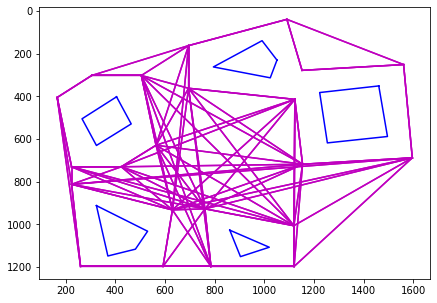

In [67]:
# Compute the visibility graph and print it
g, possibleDisplacement = computeVisibilityGraph(scaled_contours)

plt.figure(figsize = (7, 5))
plt.gca().invert_yaxis()
printGlobalNavigation(original_contours, scaled_contours, possibleDisplacement)

### Path planning

In our project we want the Thymio to pass through several point of interest and come back to his initial position. We thus have something very similar to the Travelling salesman problem.

In one of the exercise cession, we learnt how to compute a solution to this problem using genetic algorithms (see [Evolution of a salesman: A complete genetic algorithm tutorial for Python](https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35)).
We also saw how we could adapt the genetic algorithm to a situation more suited for a robot, i.e with obstacles for exemple. 

However, the Pyvisgraph library that we used already contains a shortest path algorithm which is suited with the visibility graph computed previously. Indeed, it is implemented such that we can easily find the shortest path not only from two vertices of the visibility graph but also from two points that are not already in the visibility graph, which is always the case in our situation. The algorithm used by the library is the Dijkstra's algorithm. We won't go deep in the details as this algorithm has been already see in class.

To compute our trajectory we used the following steps :

It is important to notice that this algorithm does not necessarily return a trajectory which minimises the total distance travelled, but ensures to return a trajectory where the path between two interest points is optimal. Moreover, each time we look for the closest point, we use a simple euclidean norm-2 without considerating the obstacles that could be between the points.

However, we believe that the trajectory returned by our algorithm is often the optimal one or at least close to the optimal one. The algorithm is also way faster than a genetic algorithm, much simpler and reuse a shortest path algorithm already implemented and optimised to work well with a visibility graph.

Here is the implementation :

In [68]:
def computeTrajectory(graph, interestPoints): 
    """Given the visibility graph and the points of interest
       Compute a path planning allowing the Thymio to pass through all the point of interest
       and come back to his initial position

    Parameters
    ----------
    g : object of class Graph
        the visibility graph of our problem

    Returns
    -------
    path : list of list
        Each point defining the trajectory has (x, y) coordinates
        The final trajectory is basically a line joining all point of the path
    """
    
    startingPoint = interestPoints[0]
    pointTravelled2 = [startingPoint]
    path = [startingPoint]
    interestPointsLeft = [x for x in interestPoints if x != startingPoint]
    i = 0

    while i != len(interestPoints):

        index = -1
        minimum = np.inf
        point = pointTravelled2[i]

        # find the closest interest point to the current interest point
        if i != len(interestPoints) - 1:
            for pointLeft, j in zip(interestPointsLeft, range(len(interestPointsLeft))):
                dist = math.sqrt((point[X] - pointLeft[X])**2 + (point[Y] - pointLeft[Y])**2)
                if dist < minimum:
                    minimum = dist
                    index = j

        # if there is no remaining point of interest, we need to come back to the starting point
        else:
            interestPointsLeft.append(startingPoint)
            index = 0

        # compute an optimal path from the current interest point to his closest interest point using the visibility graph
        # and add the points of this new optimal path in the total path
        shortest = graph.shortest_path(vg.Point(point[X], point[Y]), vg.Point(interestPointsLeft[index][X], interestPointsLeft[index][Y]))
        for j in range(1, len(shortest)):
            path.append([shortest[j].x, shortest[j].y])

        # remove the closest interest point as we finish to explore it
        pointTravelled2.append([interestPointsLeft[index][X], interestPointsLeft[index][Y]])
        interestPointsLeft.remove([interestPointsLeft[index][X], interestPointsLeft[index][Y]])

        i += 1

    return path

Let's see the result by plotting the trajectory :

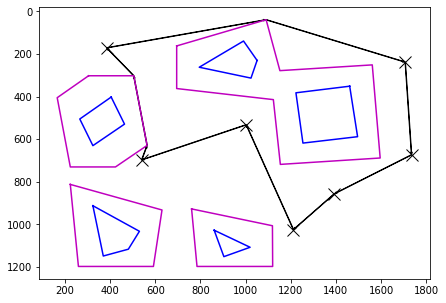

In [69]:
# Compute trajectory going through all the points of interest and going back to the starting point
interestPoints = [[1393, 856], [1212, 1024], [540, 697], [1735, 673], [1003, 532], [1707, 238], [385, 171]]

trajectory = computeTrajectory(g, interestPoints)

plt.figure(figsize = (7, 5))
plt.gca().invert_yaxis()
printGlobalNavigation(original_contours, scaled_contours, interestPoints = interestPoints, trajectory = trajectory)

# Filtering


# Local navigation
The objective of local navigation is to control the Thymio in order to avoid the obstacles on the way and to pass through the goals, based on the information given by the Kalman filter and the list of points to pass through.

import librairies

## Define the constants and gobal variables
We define some constants which will be used for several usages: 
- to scale the motors command in the desired interval
- to correctly define the PID controler
- to avoid the uncertainty of robot's behavior.

We define equally several global variables which will be useful for local navigation. These variables will be used by different motor commande functions for several times. The variable group "error" is useful for computing PID controler, and the memorised speeds will be useful in case of ANN local avoidance.  


In [2]:
# used for defining the position tolerance while moving forward to a coordinate
SENSOR_SCALE = 1500
MEMORY_FACTOR = 10
BASE_SPEED_HIGH = 150
BASE_SPEED_LOW = 75

# PID controler
KP = 100
KI = 3.5
KD = 8
ERROR_SATURATION = 10

# tolerance for unprecision
TOLERENCE_POSITION = 10

# global variables 
value_proximity = [0,0,0,0,0,0,0]  # stores horizontal proximity measurements 
value_speed = [0,0]                # stores motors' speeds measurements 
actual_position = [0,0]            # stores actual position  
actual_angle = 0                   # stores actual angle with x axis 
actual_goal = [0,0]                # stores next goal position 
no_detection = False               # stores boolien flag for detection of obstacle.  

# These variables will be used for PID controller 
error_sum = 0                      
error = 0
error_prev=0

# These variables will be used for local avoidance (memory)
speed_avoidance_l_prev = 0
speed_avoidance_r_prev = 0

## Definition of fondamental functions:
- Timer
- Thymio connexion
- Sensor measurements
- Updoad actual position 
- Motors control
There are several functions which should be called in a regular interval of time, such as the filter and the Thymio sampling measurements, because the calculation of them need the intergration. The function "RepeatedTimer" allows to call an arbitary function in a custormized interval. 

In [3]:
class RepeatedTimer(object):
    """
    definition of timer, which can be called in a fixed interval
    """
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False


In [4]:
def connexion_thymio():
    """
    This function should be called in order to connect Thymio
    "Thymio is connected :)" will be sent once the connexion is successful
    """
    global th
    th = Thymio.serial(port="COM5", refreshing_rate=0.1)
    time.sleep(10) # To make sure the Thymio has had time to connect
    print("Thymio is connected :)")

In [5]:
def deconnexion_thymio():
    """
    Deconnect Thymio once mission is accomplished
    """
    time.sleep(1)
    th.close()


In [6]:
def measure_sensor():
    """
    read the measurements of Thymio. The measurements 
    datas will be stored in global variables
    """
    global value_proximity
    global value_speed

    value_proximity=th['prox.horizontal']
    value_speed=[th['motor.left.speed'],th['motor.right.speed']]
    for i in range(2):
        if value_speed[i]>600:
            value_speed[i]=value_speed[i]-2**16
    return value_proximity,value_speed

In [7]:
def get_position(robot_pos):
    """
    This function gets the result of Kalman filter, a variable containing the information of position 
    and angle of this robot, unpack this variable to extract and to store 
    these information into the global variables
    
    param: 
    robot_pos :containing position of robot, angle of robot, bool whether robot is detected
    
    return: 
    actual_position,actual_angle : actual position and angle of robot
    """
    
    global actual_angle
    global actual_position
    global no_detection
  
    if robot_pos[2]==True:        # if the robot is detected
        no_detection= False
        actual_position= [robot_pos[0][0],robot_pos[0][1]] # upload actual state of robot
        actual_angle=robot_pos[1]
        return actual_position,actual_angle
    else:                                                  # if robot is not detected
        no_detection=True
        return actual_position,actual_angle                # keep the previous state of robot 

In [8]:
def move(l_speed=500, r_speed=500, verbose=False):
    """
    Sets the motor speeds of the Thymio 
    param l_speed: left motor speed
    param r_speed: right motor speed
    param verbose: whether to print status messages or not
    """
    # Printing the speeds if requested
    if verbose: print("\t\t Setting speed : ", l_speed, r_speed)
    
    # Changing negative values to the expected ones with the bitwise complement
    l_speed = l_speed if l_speed>=0 else 2**16+l_speed
    r_speed = r_speed if r_speed>=0 else 2**16+r_speed

    # Setting the motor speeds
    th.set_var("motor.left.target", l_speed)
    th.set_var("motor.right.target", r_speed)

In [9]:
def stop(verbose=False):
    """
    param verbose: whether to print status messages or not
    """
    # Printing the speeds if requested
    if verbose:
        print("\t\t Stopping")

    # Setting the motor speeds
    th.set_var("motor.left.target", 0)
    th.set_var("motor.right.target", 0)

## Local navigation and motor control :
In our project, the trajectory of robot is constitued by a series of coordinates of passage points. In order to make Thymio  move to a given coordinate (here goal) and be able to avoid the obstacles near to it on the way, we control the Thymio with <b>3 speeds in parallel </b> : 
- <b>Basis speed</b> on the both right and left wheels for moving forward. 
- <b>Differential speeds</b> on 2 wheels for aligning to the goal direction.
- <b>Differential speeds</b> on 2 wheels for avoiding the obstacles.


### Trajectory tracking with PID controler

In order to track correctly the trajectory, our strategy consists of making aligne Thymio all the time to the goal while moving forward. Here we will define the <b>"error angle"</b> as the how much Thymio should rotate in order to aligne with the goal. During the tracking, Thymio computes in each iteration the error angle and commands the motors in fonction of this error. The error angle is computed based on the knowlege of Thymio's actual position, goal position and Thymio's actual orientation. A simplified schemas can illustrate this geometry problem, we will adapt the sign convention of angle, positive for clockwise and negative for counter clockwise: 

<div>
<img src="images/error_compute.PNG" width="700"/>
</div>

Once the error angle is obtained, Thymio will move. The motors command of Thymio at time T is generated by a PID controler, which controls the wheels speed in using the error. We simply compute the $\sum_{t=0}^T e(t)$ by summing up the errors from beginning $e(0)$ to the moment T $e(T)$, and $\delta error$ by calculating the difference between actual error $e(T)$ and $e(T-1)$, the error at time T-1.

$$CommandInSpeed(T)= K_P * e(T) + K_I * \sum_{t=0}^T e(t) + K_D * \delta e(t) $$

Then comes to experiment and tune the PID parameters: $K_P$,$K_D$ and $K_I$.
Our robot is expected to rotate quickly to aligne to the goal direction while moving forward, so we need high $K_P$ to increase <b>the reaction of robot due to error</b>, then $K_I$ is added to <b>vanish the permenant angle error</b>. However, we observe that Thymio moved with lots of overshoot, so the term $K_D$ is added at the end to <b>reduce this overshoot</b>. We also put an <b>anti-windup system </b> which saturates the sum of error, in order to avoid not only saturation of actuators, but also the excess violent action. 




### Local avoidance using  Artificial Neural Networks with Memory



The objective of local avoidance is that Thymio should detect and avoid the obstacles on its way, while keeping tracking the trajectory to the goal as good as possible. To achieve this behavior, the speed command of Thymio should not only contain the avoidance speed, but also the PID control speed which intent to align Thymio's orientation to the goal. 

The major difficulty in the design of a such avoidance speed controler comes from the fact that, Thymio has only proximity sensors in front and behind, but not on the sides. Since the local avoidance imposes that the obstacle should only be detected by proximity sensors, camera should not give any information about it to Thymio. Once Thymio successes to avoid the obstacle, the moment that the obstacle is not visible to Thymio (at time T=t+2h in the figure), Thymio will be controled only by PID tracking speed. Since the term of error and the sum of error are strongly increased during the avoidance phase, the PID controler will give a very high command on motors in order to aligne Thymio to the goal, which leads to the collision. 
To minimize this accident, we implement the <b>avoidance controler</b> in giving Thymio the capacity to <i>"memorize"</i>. This controler is based on the <b>artificial neural networks</b>.

<div>
<img src="images/memory_comparaison.PNG" width="700"/>
</div>

The working principe of our ANN controler is below: for each iteration, 7 proximity sensors measure the environment, these measurements are stored in an array x[0:7]. Each sensor measurment is assigned to a weight, the weights of all 7 sensors measurements are stored in the arrays w_l[0:7] and w_r[0:7], the amplitude of weight means the importance of the measurement to the wheels' speed, the signe of weight impact the direction of wheels' speed.
Concerning the memory part, x[7] and x[8] store the "degraded memory". The final speeds of left and right wheels are obtained by the multiplication between x array and w array. With this approch, the actual avoidance speed is not only dependent on proiomity sensors measurements, but also on the <i>"memory"</i> of previous avoidance speeds, so that Thymio can stay in avoidance phase longer, in order to better pass through the obstacle without collision (see Figure right).



In [10]:
def calculate_error(actual_position,goal,actual_angle):
    """
    This function computes the error between the actual 
    angle and the target angle, we will try to eliminate
    this error with PID controler 
    
    params: 
    actual_position,goal,actual_angle
    
    return: 
    error
    """
    
    global error_sum 
    global no_detection
    global error
    global error_prev
    
    goal_array = np.array([goal[0],goal[1]])
    actual_position_array = np.array([actual_position[0],actual_position[1]])
   
    direction = goal_array - actual_position_array
    angle = np.arctan2(direction[1], direction[0])
    error_prev = error
    error = -actual_angle + angle 

    if error < -np.pi:
        error += 2*np.pi 
    if error >  np.pi:
        error -= 2*np.pi 

    error_sum += error

    return error

In [11]:
def follow_the_way_to_dream(actual_position,goal,actual_angle):
    '''
    This function aims to command the motors of Thymio based on
    the angle error previously calculated.
    
    It has 2 parts of controls to the motor: 
        - speed for tracking the way to goal if no obstacle is detected
        - speed of local avoidance if the obstacle is detected
    
    params: 
    actual_position,goal,actual_angle
    '''
    global error_sum 
    global value_proximity
    global speed_avoidance_l_prev
    global speed_avoidance_r_prev

    

    if no_detection == False:

        '''
        part 1: local avoidance motor speed control
        Thymio will turn in order to avoid the obstacle
        base on the proximity sensor, it uses the memory 
        in order to "memorize" the existance of obstacle. 
        So Thymio can turn more to avoid it.
        
        '''
        x = np.array([0,0,0,0,0,0,0,0,0])      # array containing the measurement datas and memorized speeds
        
        
        # ponderation of importance of each sensor contributing the rotation [1:7] 
        # amplitude of movement for each motor due to avoidance [8:9]
        w_l = np.array([40,  20, -20, -20, -40,  30, -10, 8, 0])
        w_r = np.array([-40, -20, 20,  20,  40, -10,  30, 0, 8])

        x[:7]= np.array(value_proximity) / SENSOR_SCALE     # compute the roration due to obstacle
        x[7] = speed_avoidance_l_prev / MEMORY_FACTOR       # memory degradation
        x[8] = speed_avoidance_r_prev / MEMORY_FACTOR 

        speed_avoidance_l = np.sum(x * w_l)
        speed_avoidance_r = np.sum(x * w_r)
        speed_avoidance_l_prev=speed_avoidance_l
        speed_avoidance_r_prev=speed_avoidance_r


        #if memory to abstacle avoidance mode is still existing, higher basis speed to pass through
        if x[7] != 0 or x[8] != 0:
            base_speed = BASE_SPEED_HIGH
        else : 
            base_speed = BASE_SPEED_LOW

        '''
        part 2: PID motor speed control
        Thymio will try to ajuste its move orientation and turn in order to aligne 
        to the goal all the time
        
        '''

        error = calculate_error(actual_position,goal,actual_angle)
        

        if error_sum > ERROR_SATURATION:
            error_sum = ERROR_SATURATION
        if error_sum < -ERROR_SATURATION:
            error_sum = -ERROR_SATURATION
        
        
        # Compute the speed relative to PID controler
        vitesse_PID = KP * error + KI * error_sum + KD *(error-error_prev)

        # combining the final speed 
        speed_l = base_speed + vitesse_PID + speed_avoidance_l
        speed_r = base_speed - vitesse_PID + speed_avoidance_r

        move(int(speed_l),int(speed_r))
  
    else:
        stop()

## Defining the next destination
Since there will be a several points generated in the list of trajectory, Thymio should pass them one after another, so it's inportant for Thymio to know which point is its actual destination. 
Firstly, in the initialization, we will assigne to Thymio the first point which is in the list of destination. Then, Thymio will move. 
The function detect_trajectoy aims to compare the actual position of Thymio and the actual goal to go. If the position of Thymio is in side of the cercle centered in actual goal with the radius TOLERENCE_POSITION, then we consider that Thymio arrive at the goal, so we update the actual goal to go. 

In [12]:
def detect_trajectory(actual_position,goal_actual): 
    """
    param: actual_position,goal_actual
    return: True or False depending on if Thymio is on the goal   
    """ 
    if (abs(goal_actual[0]-actual_position[0]) <= TOLERENCE_POSITION) and (abs(goal_actual[1]-actual_position[1])<=TOLERENCE_POSITION):   
        return True
    else:
        return False


In [13]:
def mission_accomplished():
    """
    param: none
    This function prints "Mission is accomplished!! " when Thymio has passed all the points  
    """ 
    stop()
    print("Mission is accomplished!! ")


# Main code

